In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
!ls ./data

historical_hourly_weather_data       new_york_weather_dropped_col.csv
new_york_weather.csv                 new_york_weather_with_fahrenheit.csv
new_york_weather_all_numerical.csv   weather_clean.csv
new_york_weather_date_index.csv


In [3]:
df = pd.read_csv('./data/weather_clean.csv')

In [4]:
df.head(1)

,date,temperature_f,wind_dir_degrees,wind_speed_mph,broken_clouds,drizzle,dust,few_clouds,fog,freezing_rain,...,sky_is_clear,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain
0,2012-10-01 13:00:00,59.11,260.0,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.date.duplicated().value_counts()

False    44460
Name: date, dtype: int64

In [6]:
df.shape

(44460, 40)

In [7]:
df.iloc[:, :4].describe()

,temperature_f,wind_dir_degrees,wind_speed_mph
count,44460.000000,44460.000000,44460.000000
mean,54.030706,196.250247,6.674584
std,18.397683,107.433676,4.823533
min,-8.300000,0.000000,0.000000
25%,39.580000,104.000000,4.000000
50%,54.880000,220.000000,6.000000
75%,69.080000,289.000000,8.000000
max,98.740000,360.000000,55.000000


In [8]:
print(df.date[0])
print(df.date[44459])

2012-10-01 13:00:00
2017-10-28 00:00:00


In [9]:
df.dtypes[0:4]

date                 object
temperature_f       float64
wind_dir_degrees    float64
wind_speed_mph        int64
dtype: object

In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
df.dtypes[0:4]

date                datetime64[ns]
temperature_f              float64
wind_dir_degrees           float64
wind_speed_mph               int64
dtype: object

In [12]:
df = df.set_index('date').sort_index()

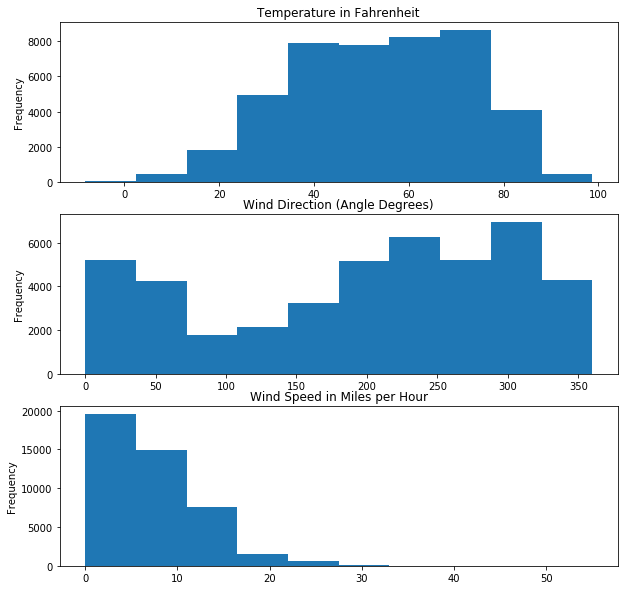

In [13]:
fig, ax = plt.subplots(
    nrows = 3,
    ncols = 1,
    figsize = (10, 10)
    
)

df['temperature_f'].plot(kind = 'hist', 
                         ax = ax[0], 
                         title = 'Temperature in Fahrenheit'),

df['wind_dir_degrees'].plot(kind = 'hist', 
                         ax = ax[1], 
                         title = 'Wind Direction (Angle Degrees)');

df['wind_speed_mph'].plot(kind = 'hist', 
                         ax = ax[2], 
                         title = 'Wind Speed in Miles per Hour');

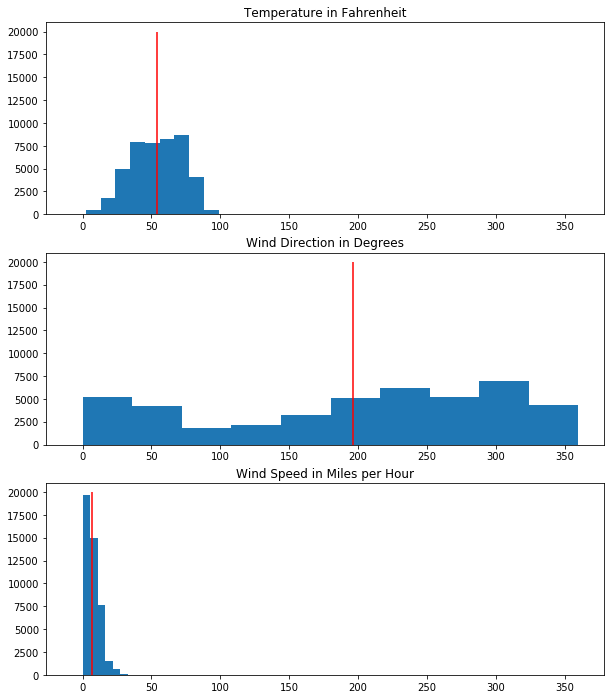

In [14]:
plt.figure(figsize = (10,12))


ax2 = plt.subplot(312)
ax2.set_title('Wind Direction in Degrees')
ax2.hist([df['wind_dir_degrees']])
ax2.vlines(x = np.mean(df['wind_dir_degrees']), 
           ymin = 0, 
           ymax = 20000, 
           color = 'r');

ax3 = plt.subplot(313, sharex = ax2)
ax3.set_title('Wind Speed in Miles per Hour')
ax3.hist([df['wind_speed_mph']])
ax3.vlines(x = np.mean(df['wind_speed_mph']), 
           ymin = 0, 
           ymax = 20000, 
           color = 'r');

ax1 = plt.subplot(311, sharex = ax2, sharey = ax3)
ax1.set_title('Temperature in Fahrenheit')
ax1.hist([df['temperature_f']])
ax1.vlines(x = np.mean(df['temperature_f']), 
           ymin = 0, 
           ymax = 20000, 
           color = 'r');

In [15]:
df_16 = df['2016']

<BarContainer object of 8784 artists>

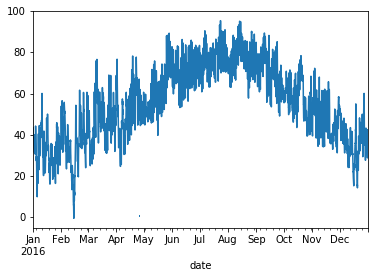

In [16]:
df_16.temperature_f.plot()
plt.bar(df_16.index, df_16.thunderstorm)

In [25]:
!ls ../

Client_Project_Ixchel.ipynb
Client_Project_John.ipynb
Client_Project_Kevin.ipynb
EDA_Weather_Outage.ipynb
Ixchel_Twitter.ipynb
Merge_Notebook.ipynb
Merge_Weather_and_Tweets.ipynb
NotifyNYC_Tweets_OpenNYC.ipynb
NotifyNYC_tweets.csv
Open_NYC_Non_Outages.ipynb
Untitled.ipynb
Weather
converting-text-files-to-combined-dictionary.ipynb
data
images
mycsv.csv
raw_tweets
saved_tweets.csv
twitter_credentials.json
working_df.csv
working_df_without_retweets.csv


In [27]:
outages = pd.read_csv('../data/weather_target_numerical_drop.csv')

In [31]:
outages.datetime = pd.to_datetime(outages.datetime)

In [ ]:
outages = outages.set_index('datetime').sort_index()

In [40]:
one = outages[outages['outage'] == 1]
one.head(2)

,aerial_(fly-over),drills/exercises,environmental,fire,infrastructure,mass_transit_disruption,mass_transit_restoration,missing_adult,missing_child/adolescent,parking,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-04 05:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-04 10:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
temp_1 = one.loc[:, ['temperature_f']]
temp_1.head()

,temperature_f
datetime,
2012-10-04 05:00:00,62.65
2012-10-04 10:00:00,63.08
2012-10-04 15:00:00,66.95
2012-10-08 15:00:00,52.07
2012-10-13 11:00:00,41.65


In [47]:
# df.temperature_f.resample('M').mean().plot()
# temp_1.plot(kind='scatter', x=temp_1.index, y='temperature_f')

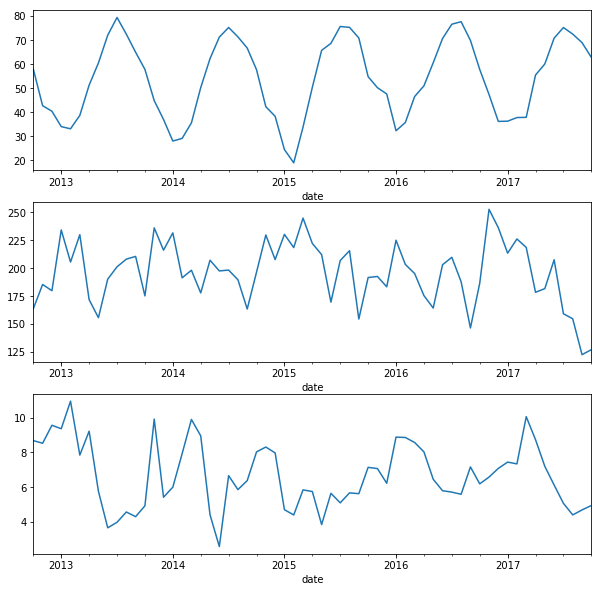

In [17]:
fig, ax = plt.subplots(
    nrows = 3,
    ncols = 1,
    figsize = (10, 10)
    
)

df.temperature_f.resample('M').mean().plot(ax = ax[0]);

df.wind_dir_degrees.resample('M').mean().plot(ax = ax[1]);

df.wind_speed_mph.resample('M').mean().plot(ax = ax[2]);

# df['wind_dir_degrees'].resample('M').plot(kind = 'hist', 
#                                           ax = ax[1], 
#                                           title = 'Wind Direction (Angle Degrees)');

# df['wind_speed_mph'].resample('M').plot(kind = 'hist', 
#                                        ax = ax[2], 
#                                        title = 'Wind Speed in Miles per Hour');

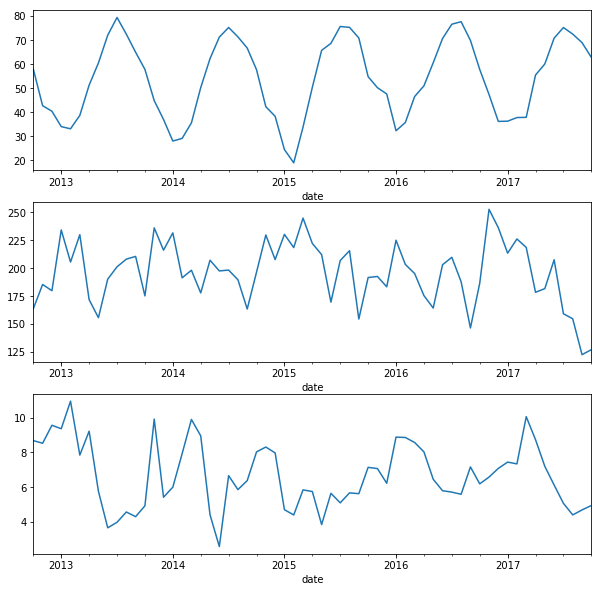

In [17]:
fig, ax = plt.subplots(
    nrows = 3,
    ncols = 1,
    figsize = (10, 10)
    
)

df.temperature_f.resample('M').mean().plot(ax = ax[0]);

df.wind_dir_degrees.resample('M').mean().plot(ax = ax[1]);

df.wind_speed_mph.resample('M').mean().plot(ax = ax[2]);

# df['wind_dir_degrees'].resample('M').plot(kind = 'hist', 
#                                           ax = ax[1], 
#                                           title = 'Wind Direction (Angle Degrees)');

# df['wind_speed_mph'].resample('M').plot(kind = 'hist', 
#                                        ax = ax[2], 
#                                        title = 'Wind Speed in Miles per Hour');

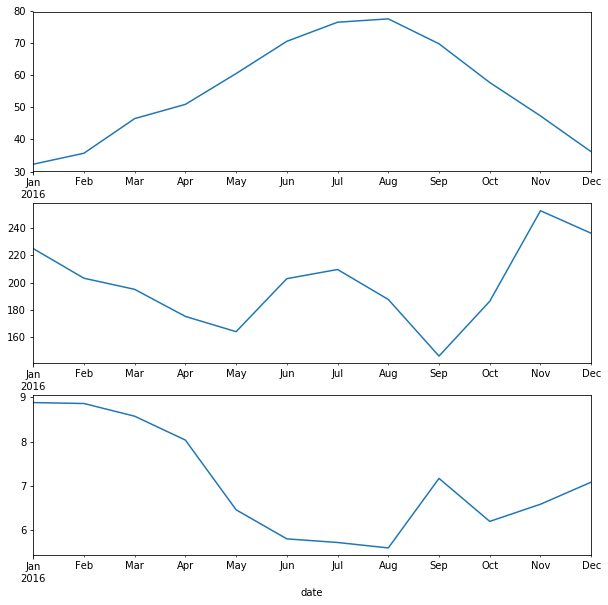

In [18]:
fig, ax = plt.subplots(
    nrows = 3,
    ncols = 1,
    figsize = (10, 10)
    
)

df_16.temperature_f.resample('M').mean().plot(ax = ax[0]);

df_16.wind_dir_degrees.resample('M').mean().plot(ax = ax[1]);

df_16.wind_speed_mph.resample('M').mean().plot(ax = ax[2]);


In [19]:
df.head()

,temperature_f,wind_dir_degrees,wind_speed_mph,broken_clouds,drizzle,dust,few_clouds,fog,freezing_rain,haze,...,sky_is_clear,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain
date,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,59.11,260.0,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 14:00:00,59.16,260.0,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 15:00:00,59.30,260.0,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 16:00:00,59.44,260.0,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 17:00:00,59.58,261.0,13,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


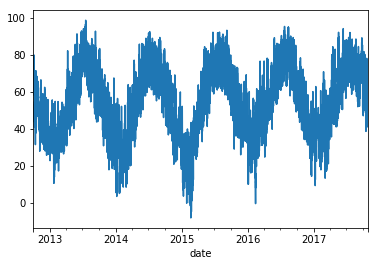

In [20]:
df.temperature_f.plot()

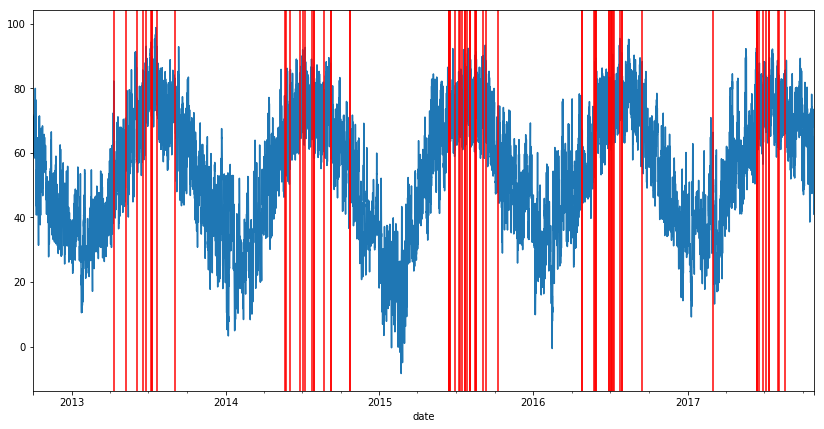

In [21]:
df.temperature_f.plot(figsize = (14, 7))
vlines = df[df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')


In [22]:
vlines = df[df['thunderstorm'] == 1].index